# This notebook is used for visualizing the results from cSNMF.ipynb
Map visualizations require links.csv from ../DataFiles/

We do the following visualizations:
- Plot of each signature, for every day of the week (50 sigs $\times$ 7 days)
- Map of all links for each signature
- Map of all links that use 7+ signatures

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

import config

<IPython.core.display.Javascript object>


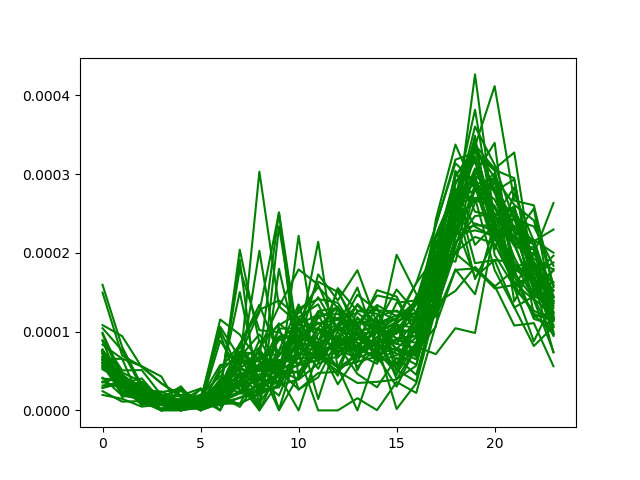

In [3]:
W = np.loadtxt('W_trips.txt')
for column in W.T:
    signature = column.reshape((len(column)//24, 24))
    for day, entry in enumerate(signature):
        day_of_week = day%7
        # Day 0 is Saturday
        if day_of_week == 2:
            plt.plot(range(24), entry, 'g')
    break

In [7]:
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString
import config

filenames = config.generate_filenames('')
full_link_ids = np.loadtxt('full_link_ids.txt', dtype=int)
crs = {'init': 'epsg:4326'}

AttributeError: module 'config' has no attribute 'generate_filenames'

In [ ]:
H_loaded = gpd.pd.read_csv(filenames['H_trips'], delimiter=' ', names=full_link_ids)
H_loaded

In [ ]:
signature_link_lists = list()
link_df = gpd.pd.read_csv(filenames['links'])

for signature in range(config.RANK):
    signature_list = H_loaded.loc[signature,:][H_loaded.loc[signature,:]>0].keys().tolist()
    signature_link_lists.append(signature_list)
    if len(signature_list)>0:
        df = link_df[link_df['link_id'].isin(signature_link_lists[signature])]
        df['geom'] = df.apply(lambda x: LineString([(x.startX,x.startY),(x.endX,x.endY)]), axis=1)
        geo_df = gpd.GeoDataFrame(df, crs=crs, geometry='geom')
        location =  'Signature_Maps\sig' + format(signature, '02d')
        geo_df.to_file(location)
    else:
        print('Signature'+str(signature)+'has no links')

In [ ]:
H_loaded.loc[69].sum()

In [5]:
threshold = 7 # for number of signatures for a link considered high
ds = np.sum(H_loaded>0, axis=0)
link_ids_with_high_signature_count = ds[ds>=threshold].keys().tolist()

NameError: name 'H_loaded' is not defined

In [ ]:
link_df = gpd.pd.read_csv(filenames['links'])
df = link_df[link_df['link_id'].isin(link_ids_with_high_signature_count)]
df['geom'] = df.apply(lambda x: LineString([(x.startX,x.startY),(x.endX,x.endY)]), axis=1)
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry='geom')
geo_df.to_file('High_Signature_Map')

# Temporal visualizations:

In [6]:
import numpy as np
import Visualizations as vz
#D = np.loadtxt('D_trips.txt')
#H = np.loadtxt('H_trips.txt')
W = np.loadtxt('W_trips.txt')


vz.plot_particular_weekday(W[:, 2], 0, mean = True)
vz.plot_particular_day(W[:, 2], 0*7 + 0, 'r')

ModuleNotFoundError: No module named 'geopandas'

In [3]:
vz.find_extreme_events_particular_weekday(W, 0)

0 [0, 4, 27, 30, 32, 34]
1 [19, 44, 48, 50]
2 [0, 13, 37]
3 [0, 34, 49]
4 [13, 30, 34, 47, 50]
5 [0, 34, 42, 44, 45]
6 [0, 2, 20, 34, 51]
7 [0, 36, 38, 45, 48]
8 [0, 14, 20, 25, 27, 34, 36, 42, 43]
9 [0, 4, 14, 34, 40]
10 [10, 34, 35, 47, 51]
11 [0, 1, 10, 21, 34, 38, 45]
12 [0, 17, 19, 34, 49, 50]
13 [0, 21, 23, 24, 34, 35]
14 [0, 6, 25, 27, 28, 38, 50]
15 [0, 31, 34, 37, 39]
16 [2, 4, 5, 6, 52]
17 [0, 14, 22, 25, 34, 47]
18 [0, 17, 40, 43, 46, 48, 52]
19 [20, 22, 27, 36, 37, 45]
20 [0, 23, 24, 34, 43, 49]
21 [0, 13, 17, 34, 35, 41]
22 [0, 3, 25, 34, 49, 50]
23 [4, 48, 49, 52]
24 [0, 34, 45]
25 [14, 19, 21, 34, 41, 42, 45]
26 [10, 17, 44, 45, 49]
27 [0, 25, 34]
28 [10, 19, 34, 36, 39]
29 [4, 22, 23, 27, 35, 42, 49]
30 [0, 12, 34, 44, 48, 50]
31 [0, 14, 30, 34, 37, 51]
32 [0, 14, 20, 34, 42]
33 [19, 27, 30, 43, 52]
34 [0, 12, 28, 30, 41, 44, 48, 51]
35 [21, 36, 41, 48]
36 [0, 5, 6, 7, 9, 34, 36, 42]
37 [8, 9, 16, 17, 18, 38, 48, 49, 50]
38 [6, 13, 19, 22, 26, 31, 33, 44]
39 [24, 49, 50

In [ ]:
D2 = np.nan_to_num(D)
np.linalg.norm(D2-W@H)/np.linalg.norm(D2)*100

In [ ]:
D[0,0:10]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
WH = W@H

sig = 0
day = 1
fig = plt.figure(figsize = (56, 9))  # size in inches

#[plt.plot(D[week*7*24 + day*24: week*7*24 + day*24 + 24, sig], 'g') for week in range(53)]
[plt.plot(D[week*7*24 + 0: week*7*24 + 7*24, sig], 'r') for week in range(15)]
[plt.plot(WH[week*7*24 + 0: week*7*24 + 7*24, sig], 'b') for week in range(15)]
plt.savefig('Full_week_link0.png')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
WH = W@H

sig = 16
day = 1
fig = plt.figure(figsize = (56, 9))  # size in inches

#[plt.plot(D[week*7*24 + day*24: week*7*24 + day*24 + 24, sig], 'g') for week in range(53)]
[plt.plot(D[week*7*24 + 0: week*7*24 + 7*24, sig], 'r') for week in range(15)]
[plt.plot(WH[week*7*24 + 0: week*7*24 + 7*24, sig], 'b') for week in range(15)]
plt.savefig('Full_week_link16.png')
plt.show()

In [ ]:
import Visualizations as vz
import numpy as np
W = np.loadtxt('W_trips.txt')
vz.plot_all_signatures_particular_weekday(W, weekday=0, mean = True, extreme = True)

In [ ]:
fields = ['rank', 'threshold', 'beta', 'iteration', 'error_before_axing', 'sparsity_before_axing',
          'error_after_axing', 'sparsity_after_axing', 'spikeyness_mean', 'spikeyness_std', 'percent_zeros_H']

raw = np.array([\
[50,0.5,1000,187,25.6674883138,0.724677771467,41.0225841279,0.866354897485,0.685480900318,0.126166137491,0.911963509991],
[60,0.5,1000,253,24.3432298654,0.774516498794,39.4669297358,0.893674445982,0.674227902795,0.140883303958,0.93337677382 ],
[70,0.5,1000,195,23.756524428 ,0.77953485637 ,39.4664938566,0.894401055224,0.694830048546,0.12206727311 ,0.937588432419],
[50,0.5,2000,200,25.5916664602,0.755849916225,40.3973114336,0.883902202696,0.641419593729,0.125137174258,0.922502172024],
[60,0.5,2000,214,24.5724601281,0.787484552586,39.4079798471,0.901314398479,0.645450103119,0.128935090911,0.937351578338],
[70,0.5,2000,213,23.6911464254,0.814180095816,38.1502355669,0.912728500107,0.657531392813,0.146041500254,0.948082412809],
[50,0.5,3000,211,25.5975656265,0.776840096576,39.4146943169,0.894206457924,0.621530120579,0.139374591314,0.929304952215],
[60,0.5,3000,207,24.7230114016,0.802759260588,39.3062473432,0.908879226768,0.632785720459,0.136641127466,0.941854908775],
[70,0.5,3000,189,23.9887706962,0.81944166833 ,38.3702421277,0.915190937537,0.668213382782,0.175714355264,0.949298746432]])